In [1]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print 'Rank of the matrix:', np.linalg.matrix_rank(a)
b = a + 1e-5 * np.random.randn(n, n)
print 'Rank of the matrix:', np.linalg.matrix_rank(b)

Rank of the matrix: 1
Rank of the matrix: 50


In [5]:
u, s, v = np.linalg.svd(b)
print s[1]/s[0]
r = 1
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
a1 = u1.dot(np.diag(s1).dot(v1))
print np.linalg.norm(b - a1, 2)/s[0]

2.70292713735e-06
2.70292713735e-06


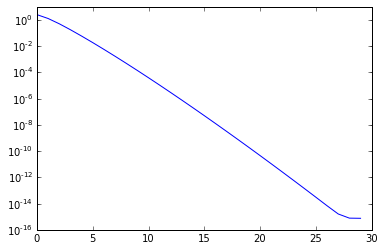

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
n = 1000
a = [[1.0/(i+j+1) for i in xrange(n)] for j in xrange(n)] #Hilbert matrix 
a = np.array(a)
u, s, v = np.linalg.svd(a)
fig, ax = plt.subplots(1, 1)
ax.semilogy(s[:30])
#We have very good low-rank approximation of it!

3.61306034376e-10


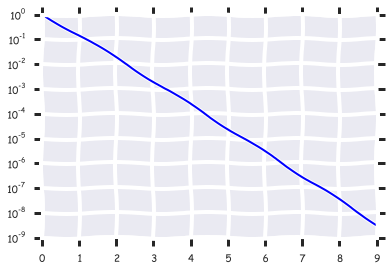

In [7]:
import numpy as np
n = 128
t = np.linspace(0, 5, n)
x, y = np.meshgrid(t, t)
f = 1.0 / (x + y + 0.5)
u, s, v = np.linalg.svd(f, full_matrices=False)
r = 10
u = u[:, :r]
s = s[:r]
v = v[:r, :] #Mind the transpose here!
fappr = u.dot(np.diag(s).dot(v))
er = np.linalg.norm(fappr - f, 'fro') / np.linalg.norm(f, 'fro')
print er
plt.semilogy(s/s[0])

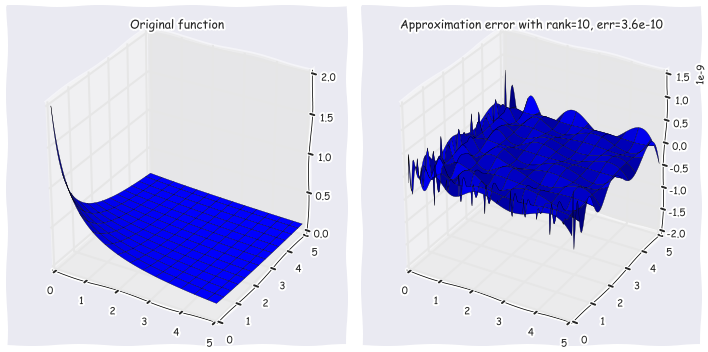

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.xkcd
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, f)
ax.set_title('Original function')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, fappr - f)
ax.set_title('Approximation error with rank=%d, err=%3.1e' % (r, er))
fig.subplots_adjust()
fig.tight_layout()

3.29710991366e-09


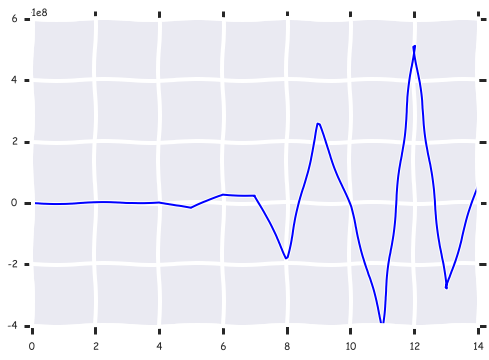

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
n = 15
a = [[1.0/(i + j + 1) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
rhs = np.ones(n) #Right-hand side
x = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(x) - rhs) / np.linalg.norm(rhs)
print er
plt.xkcd()
plt.plot(x)

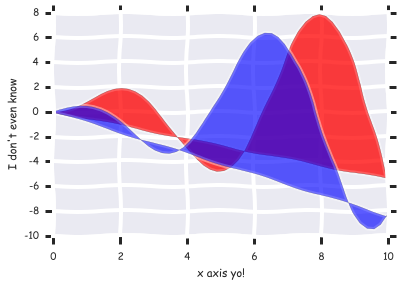

In [15]:
x = np.linspace(0, 10)
y1 = x * np.sin(x)
y2 = x * np.cos(x)

plt.fill(x, y1, 'red', alpha=0.5)
plt.fill(x, y2, 'blue', alpha=0.4)
plt.xlabel('x axis yo!')
plt.ylabel("I don't even know")

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n = 1000
a = [[1.0/(i + j + 1) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
rhs = np.ones(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a, 2)
print 'Error:', er, 'Condition number:', cn

Error: 1.0706743037e-06 Condition number: 8.34987674204e+20


Error: 20.1474046457 Condition number: 3.33972881047e+19


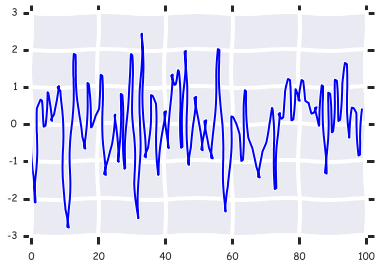

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
a = [[1.0/(i + j + 1) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a)
print 'Error:', er, 'Condition number:', cn


u, s, v = np.linalg.svd(a)
rhs = np.random.randn(n)
plt.plot(u.T.dot(rhs))

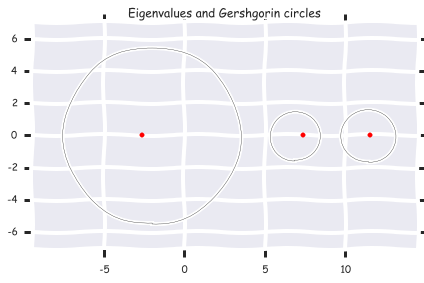

In [21]:
import numpy as np
%matplotlib inline
n = 3
fig, ax = plt.subplots(1, 1)
a = [[5, 1, 1], [1, 0, 0.5], [2, 0, 10]]
#a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
#a = np.diag(np.arange(n))
a = a +2*np.random.randn(n, n)
#u = np.random.randn(n, n)
#a = np.linalg.inv(u).dot(a).dot(u)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in xrange(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, label='x', color='r')
plt.axis('equal')
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

In [25]:
%matplotlib inline
import numpy as np
import sympy
from sympy.matrices import Matrix
import IPython
from sympy.interactive.printing import init_printing
init_printing(use_latex=True)
n = 5
w = Matrix(n, n, lambda i, j: 1/(i + j +  sympy.Integer(1)/2))
L, U, tmp = w.LUdecomposition()
L

⎡ 1    0    0   0   0⎤
⎢                    ⎥
⎢1/3   1    0   0   0⎥
⎢                    ⎥
⎢1/5  6/7   1   0   0⎥
⎢                    ⎥
⎢          15        ⎥
⎢1/7  5/7  ──   1   0⎥
⎢          11        ⎥
⎢                    ⎥
⎢     20   210  28   ⎥
⎢1/9  ──   ───  ──  1⎥
⎣     33   143  15   ⎦


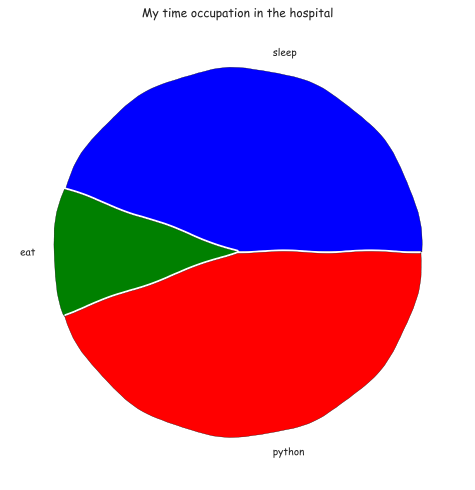

In [44]:
times = [40,10,40]
times = np.array(times)
names = ['sleep','eat','python']
fig = plt.figure(figsize=(8,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
pie = plt.pie(times,labels = names)
ax.set_title('My time occupation in the hospital')
plt.savefig('Time.png')